# Pymaceuticals Inc.
---

### Analysis

This analysis explores the effectiveness of different drug regimens in reducing tumor volume in mice. The dataset contains information on varying drug regimens, gender, weight, timepoints and the tumor volumes throughout the treatment process. After performing a through analysis, three major observations were determined: 

- Effectiveness of Capomulin 
According to the box plot of final tumor volumes for differing drug regimens, it has be observed that mice treated with the drugs Capomulin and Ramicane indicate a lower final tumor volume in comparision to Infubinol and Ceftamin. This suggests that Capomulin and Ramicane may be more effective in reducing tumors, potentially being a more effective treatment for squamous cell carcinoma. In addition, according to the statistics summary table, Capomulin and Ramicane show to have lower mean tumor volumes as well lower variance which suggests they are more consistent and realiable, further supporting it's higher effectiveness amongst other drug regimens. 
- Capomulin Across Timepoints Observation
According to the line plot of Tumor Volume Versus Timepoint for Mouse x401 treated with Capomulin, it suggests that the tumor volume of Mousex401 dreacreases consistently over time, indicating it's effective in treating tumors. Between day 0 and 10 and day 30 and 40, the data shows a significant drop in tumor volume although it lulled around day 20, potentially indicating that the treatment has intervals of effectiveness as well as stabalization sginifying time points could potentially impact it's efficacy. 
- Gender Representation in the Study
According to the pie charts representing gender in the study, they display an almost equal percentage of males to females in the study. This indicates that there is balanced representation of genders to ensure that drug efficacy results are not biased towards one gender. 


 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on ="Mouse ID")

# Display the data table for preview
print("Preview of Merged Data: ")
merged_data.head()

Preview of Merged Data: 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice.
# Count the number of unique mice
unique_mice_count = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice: {unique_mice_count}")


Number of unique mice: 249


In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print("Duplicate Mice IDs:")
print(duplicate_mice_ids)


Duplicate Mice IDs:
['g989']


In [46]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
print("Duplicate Mouse IDs:")
print(duplicate_mouse_ids)
# Filter data for a specific duplicate Mouse ID
for mouse_id in duplicate_mouse_ids:
    print(f"Data for Mouse ID {mouse_id}:")
    print(merged_data[merged_data['Mouse ID'] == mouse_id])

Duplicate Mouse IDs:
['g989']
Data for Mouse ID g989:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva  

In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
print(cleaned_data)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

In [48]:
# Checking the number of mice in the clean DataFrame.
unique_mouse_ids = cleaned_data['Mouse ID'].nunique()
print(f"Number of unique mice in the cleaned DataFrame: {unique_mouse_ids}")

Number of unique mice in the cleaned DataFrame: 249


## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean": mean_tumor,
    "Median": median_tumor,
    "Variance": variance_tumor,
    "Std_Dev": std_dev_tumor,
    "SEM": sem_tumor})

print("Summary Statistics Table:")
summary_stats


Summary Statistics Table:


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
grouped_data = cleaned_data.groupby("Drug Regimen")
advanced_summary_stats = grouped_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print(f"Advanced Summary Statistics Table")
advanced_summary_stats


Advanced Summary Statistics Table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

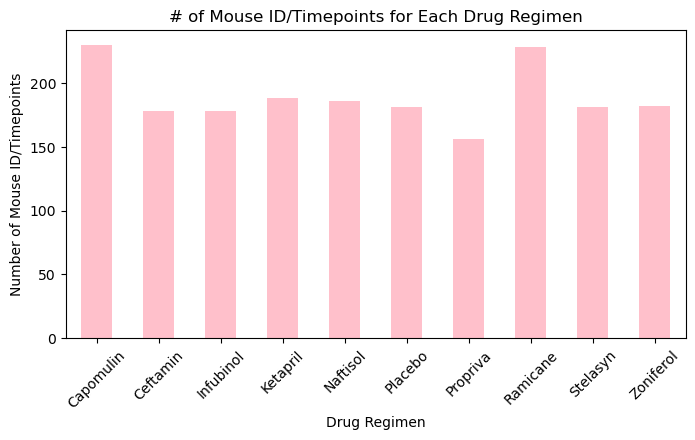

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_data = cleaned_data.groupby("Drug Regimen")
mouse_id_counts  = grouped_data["Mouse ID"].count()
mouse_id_counts.plot(kind="bar", figsize=(8,4),color="pink")

plt.title("# of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show

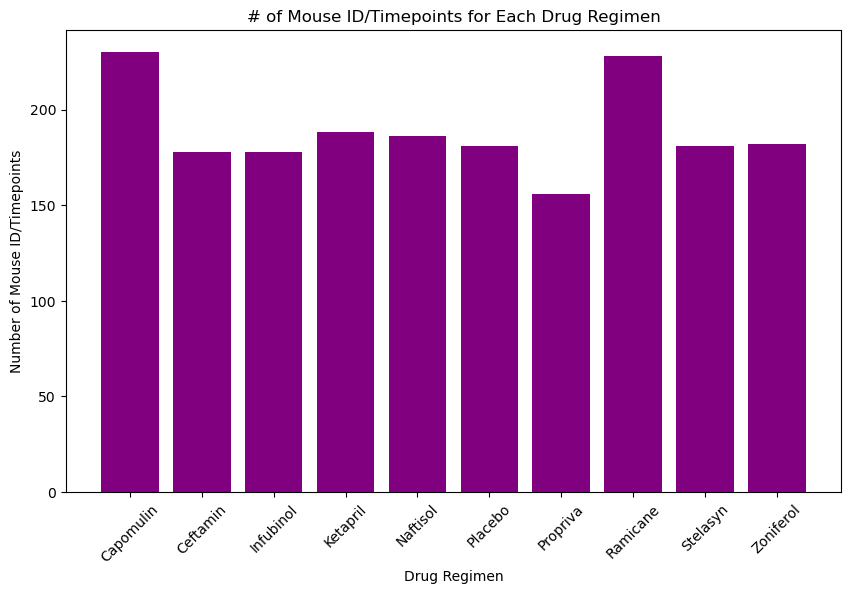

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
grouped_data = cleaned_data.groupby("Drug Regimen")
mouse_id_counts = grouped_data["Mouse ID"].count()
plt.figure(figsize=(10,6))
plt.bar(mouse_id_counts.index,mouse_id_counts.values,color="purple")

plt.title("# of Mouse ID/Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

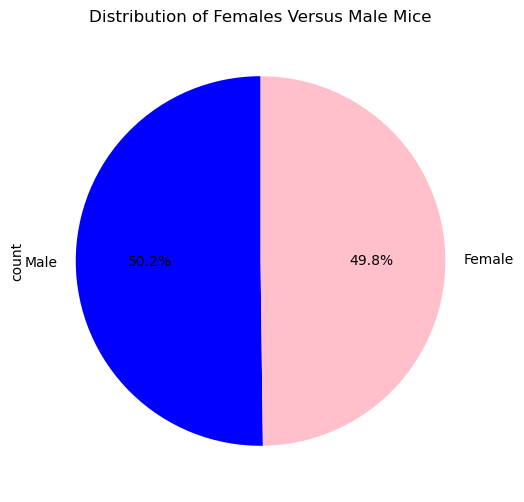

In [53]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])
# Get the unique mice with their gender
gender_count = unique_mice["Sex"].value_counts()
# Make the pie chart
gender_count.plot.pie(autopct="%1.1f%%", startangle=90, figsize=(6, 6), colors=["blue", "pink"])
plt.title("Distribution of Females Versus Male Mice")
plt.show

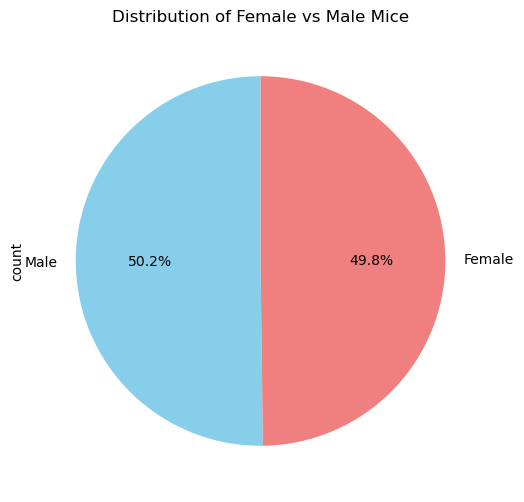

In [54]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

# Get the unique mice with their gender
unique_mice = cleaned_data.drop_duplicates(subset=["Mouse ID"])
gender_count = unique_mice["Sex"].value_counts()

# Make the pie chart
gender_count.plot.pie(autopct="%1.1f%%", startangle=90, figsize=(6, 6), colors=["skyblue", "lightcoral"])
plt.title("Distribution of Female vs Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
print("Last Timepoint Per Mouse")
merged_last_timepoint

Last Timepoint Per Mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments: 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_last_timepoint[merged_last_timepoint["Drug Regimen"]== treatment]["Tumor Volume (mm3)"]

    # add subset
    tumor_volume_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Potential outliers for {treatment}:")
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(outliers)



Potential outliers for Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


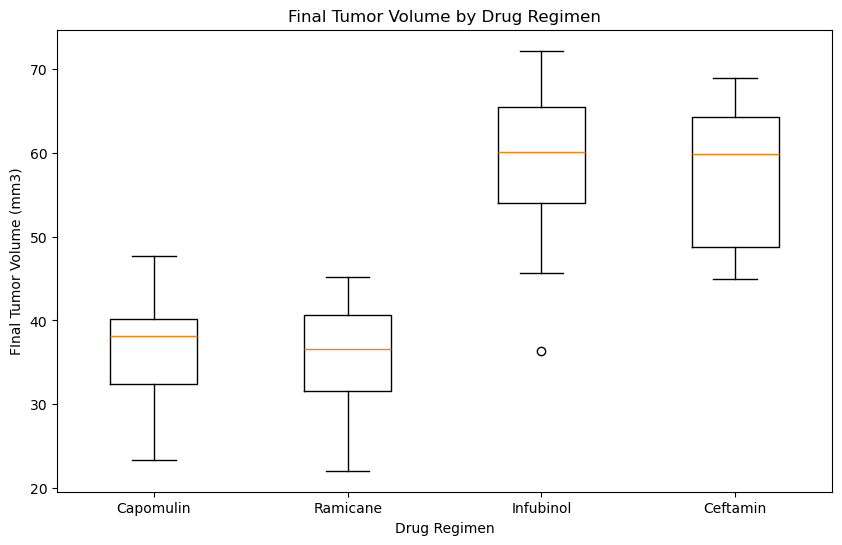

In [108]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volume_data, labels=treatments)
ax.set_title("Final Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("FInal Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

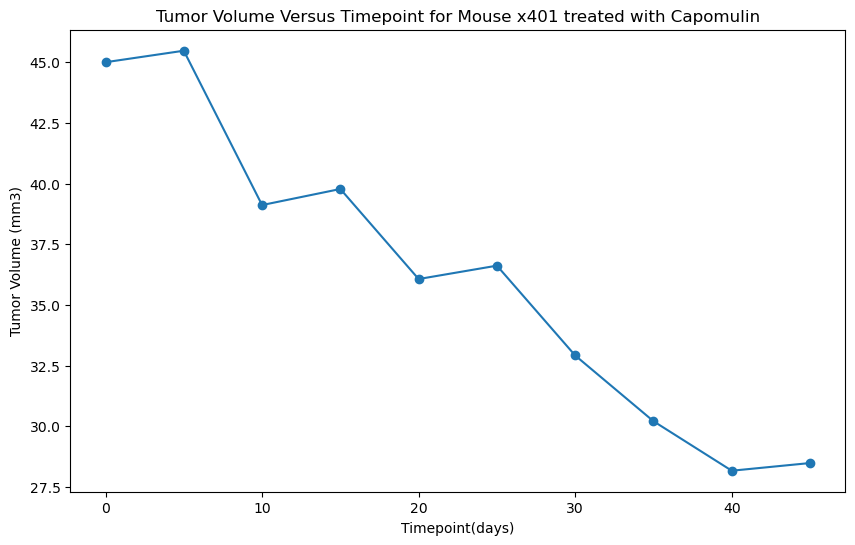

In [118]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_data = cleaned_data[(cleaned_data["Drug Regimen"]== "Capomulin") & (cleaned_data["Mouse ID"]== "x401")]
plt.figure(figsize=(10, 6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title("Tumor Volume Versus Timepoint for Mouse x401 treated with Capomulin")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

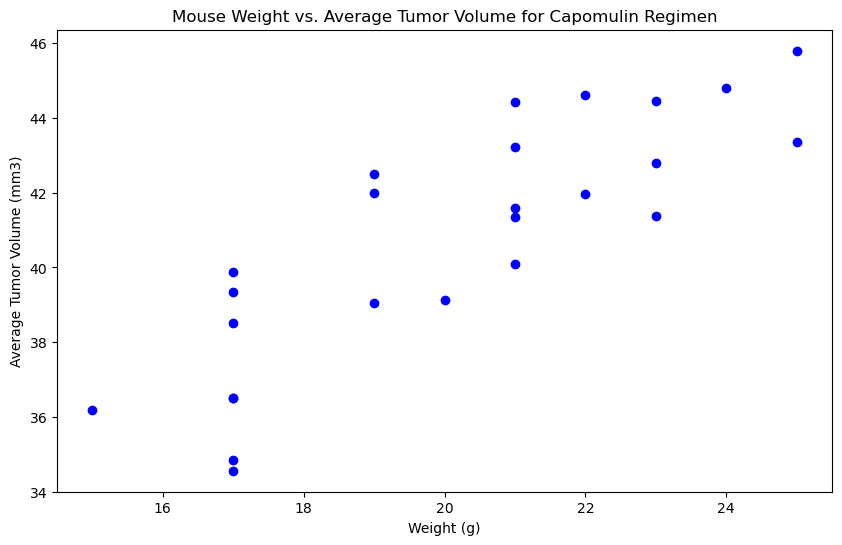

In [123]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"]== "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
avg_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}, inplace=True)
merged_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata, on="Mouse ID")
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_with_weight["Weight (g)"], merged_data_with_weight["Average Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

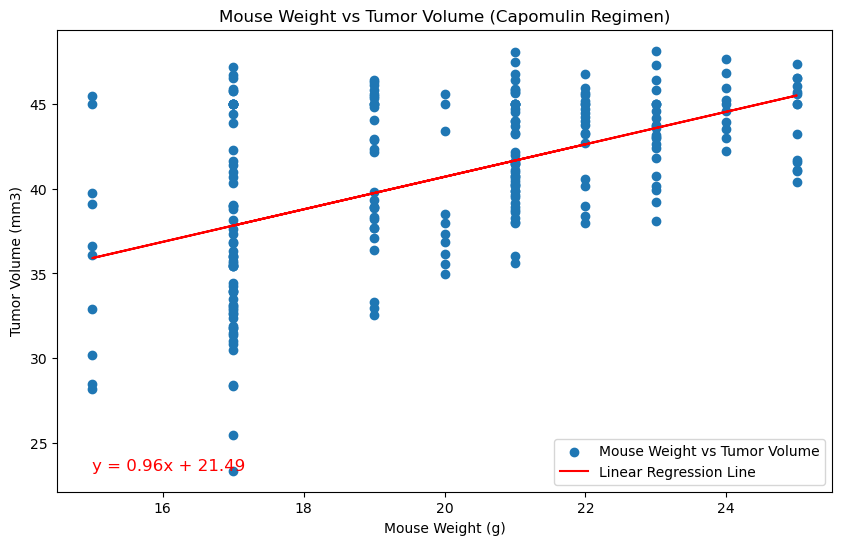

Correlation Coefficient: 0.53


In [152]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

correlation_coefficient = capomulin_data["Weight (g)"].corr(capomulin_data["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
regress_values = capomulin_data["Weight (g)"] * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], label="Mouse Weight vs Tumor Volume")
plt.plot(capomulin_data['Weight (g)'], regress_values, "r-", label='Linear Regression Line')
plt.annotate(line_eq, (capomulin_data['Weight (g)'].min(), capomulin_data['Tumor Volume (mm3)'].min()), fontsize=12, color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.show()
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")